# Аналитика данных с помощью pandas и matplotlib

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib. Требуется заполнить недостающие ячейки этого ноутбука своим кодом, запустить их и ответить на ряд вопросов.

Дедлайн: 25 мая 23:59

Как сдать работу?
- Выполнить задания
- Назвать файл с выполненным заданием в формате `<Фамилия>_<Имя>_<925/922>.ipynb`
- Прислать его семинаристу, например в тг (@Onaga1958)

Для зачёта по этой работе нужно набрать хотя бы 1 балл. В противном случае по всему курсу вы получаете неуд, см. слайды с семинара №1.

 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация по matplotlib](https://matplotlib.org/index.html)

## 1. Данные (2 балла)

Начнем с необходимых приготовлений.

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла "coins.csv". Создайте объект типа pandas.DataFrame с именем coins и в качестве индекса выберите колонку с датой.

In [3]:
coins = pd.read_csv('coins.csv', index_col = 'date')
coins

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.300000,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.300000,135.980000,132.100000,134.210000,0.0,1.500520e+09
2013-04-28,4.300000,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.300000,4.400000,4.180000,4.350000,0.0,7.377340e+07
2013-04-29,134.440000,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.440000,147.490000,134.000000,144.540000,0.0,1.491160e+09
2013-04-29,4.370000,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.370000,4.570000,4.230000,4.380000,0.0,7.495270e+07
2013-04-30,144.000000,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.000000,146.930000,134.050000,139.000000,0.0,1.597780e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-06,0.293325,4830.0,2.312763e+05,659.0,XLM,Stellar,0.293325,0.299955,0.289500,0.298269,51165000.0,5.450080e+09
2018-06-06,0.039586,7205.0,4.947760e+06,18228.0,XVG,Verge,0.039586,0.039737,0.037680,0.038797,9307450.0,5.959400e+08
2018-06-06,239.760000,10687.0,3.986308e+07,96516.0,ZEC,Zcash,239.750000,240.340000,229.210000,236.050000,56887000.0,9.769940e+08


Посмотрим что получилось

In [4]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

#### Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):
#### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [5]:
coins['name'].nunique()

70

#### 2. За какой период данные мы имеем? (0.4 балла)

In [6]:
print('from ', coins.index.min(), ' to ', coins.index.max())

from  2013-04-28  to  2018-06-06


#### 3. Есть ли пропуски в данных? Какой природы эти пропуски? (0.5 балла)

In [7]:
print("They exist. You can see type of them below")
print()
print(coins.isnull().sum())
print()
print("In details")
print()

#THIS IS FAST FOR
print("I can assume that tha coin did not exist so there are nan's")
for column, series in coins.iteritems():
    print(column)
    print(coins.loc[coins.loc[coins[column].isnull(), column].index])
    print('\n')

They exist. You can see type of them below

price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

In details

I can assume that tha coin did not exist so there are nan's
price
                  price   txCount      txVolume  activeAddresses symbol  \
date                                                                      
2017-07-13     0.520207       NaN           NaN              NaN     AE   
2017-07-13     2.010000     436.0  1.009002e+06            383.0    ANT   
2017-07-13     0.102564     328.0  1.017035e+06            231.0    BAT   
2017-07-13  2402.700000  245738.0  4.177025e+09         680465.0    BTC   
2017-07-13          NaN       1.0           NaN              2.0    BTM   
...                 ...       ...           ...    

#### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [8]:
print('name =', coins.name[coins['price'] == coins['price'].max()].tolist()[0])
print('date =', coins['price'].idxmax())
print('price =', coins.loc[coins['price'].idxmax(), 'price'].max())


name = Bitcoin
date = 2017-12-17
price = 19475.8


#### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. (0.5 балла)

Amount of different coins is 70
so there is nothing bad in using dict

max is Bitcoin with capitalization 57439466431000.0
min is KingN Coin with capitalization 10608251.0


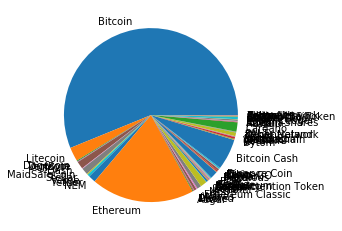

In [9]:
print("Amount of different coins is", coins['name'].unique().size)
print("so there is nothing bad in using dict")

values = {coin : -1 for coin in coins['name'].unique()}
value_min = float('inf')
value_max = 0.0

for coin in coins['name'].unique():
    values[coin] = coins[coins['name'] == coin]['market'].sum()
    if values[coin] < value_min:
        value_min = values[coin]
        name_min = coin
    if values[coin] > value_max:
        value_max = values[coin]
        name_max = coin
    
print()
print("max is", name_max, "with capitalization", value_max)
print("min is", name_min, "with capitalization", value_min)

values = list(values.values())
plt.pie(values, labels = coins.name.unique())
plt.show()

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

#### Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.
На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать matplotlib.finance.candlestick_ohlc (mpl_finance.candlestick_ohlc), но можно и без него.

In [10]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    data = coins[coins['symbol'] == symbol].loc[start_date: end_date]
    price_labels = ['open', 'close', 'high', 'low']
    
    fig = plt.figure(figsize=(16, 9), facecolor='whitesmoke', dpi=200)
    
    xy = fig.add_subplot(111)
    xy.set_title(symbol, fontsize=20)
    xy.set_xlabel('Date', fontsize=15)
    xy.set_ylabel('Price', fontsize=15)
    
    for price_label in price_labels:
        xy.plot(data.index, data[price_label])
        
    amount_of_days = data.shape[0]
    xy.set_xticks(data.index.values[0: amount_of_days: amount_of_days // 10])
    
    xy.legend(price_labels, loc='best')
    xy.grid(True)
    
    plt.show()

Посмотрим, что получилось:

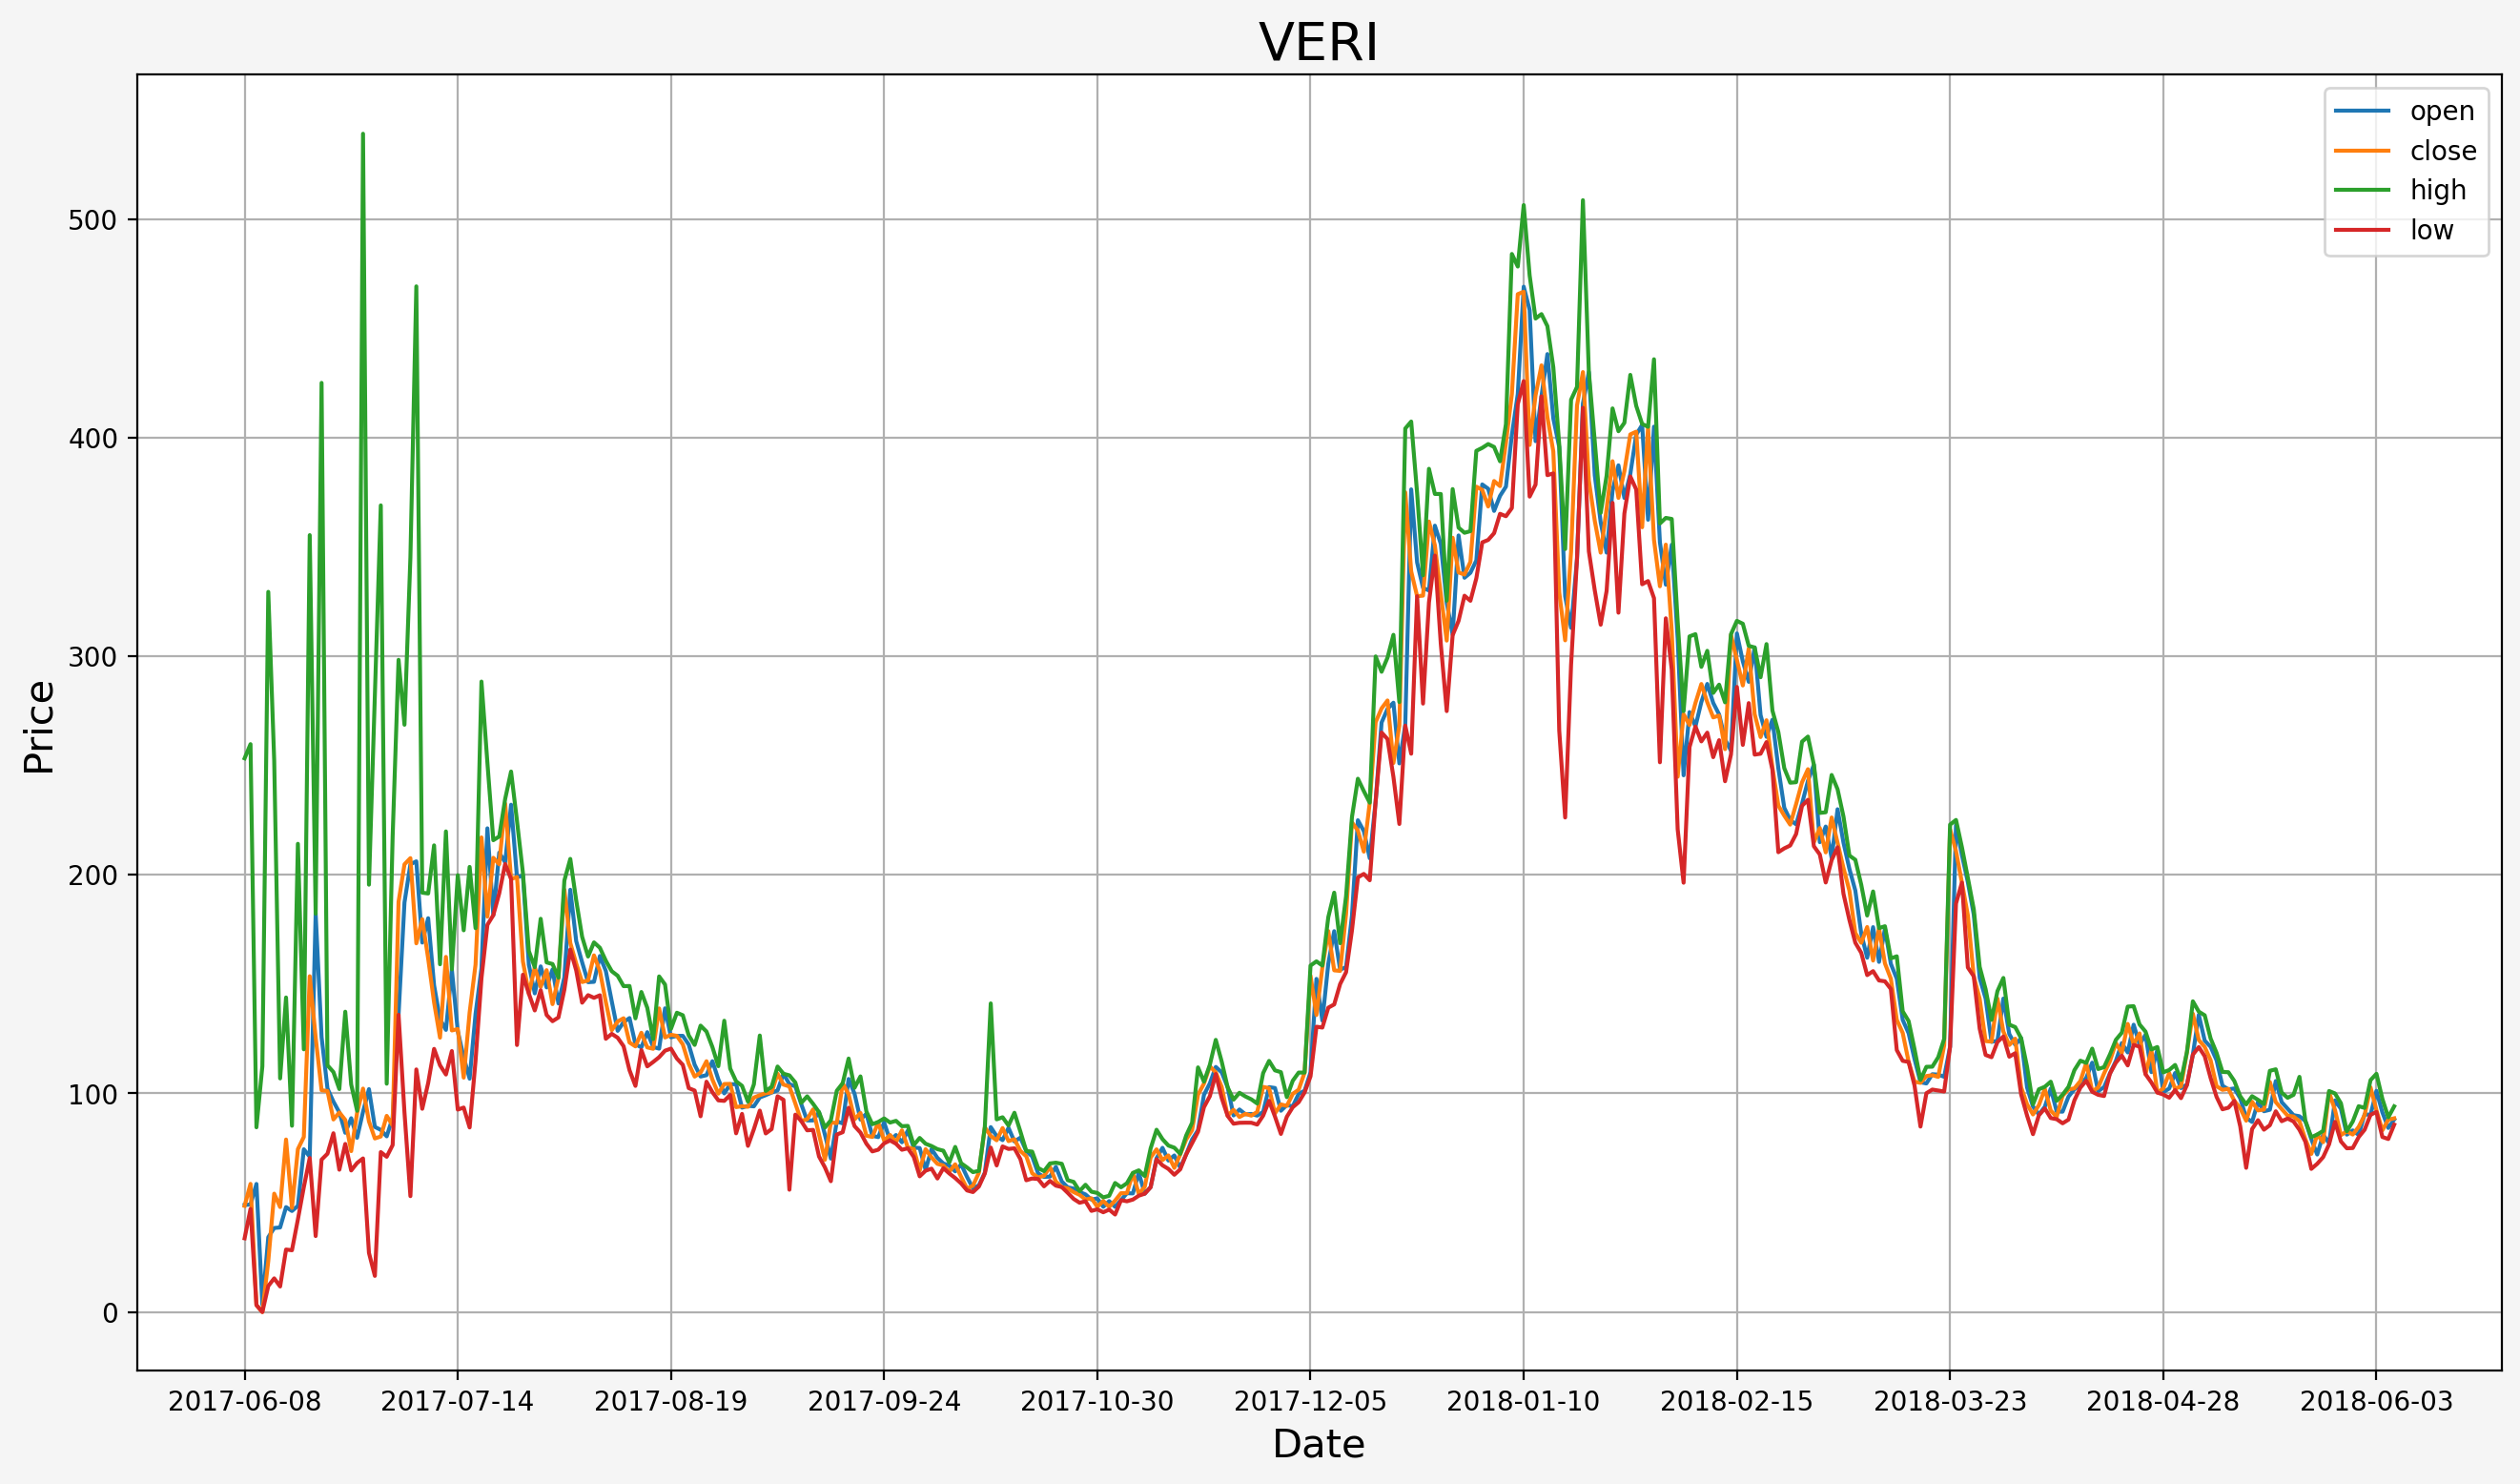

In [12]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30') 

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)
Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - pump'n'dump (накачка и сброс). Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются
вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде
успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

#### Ваша задача найти самый сильный pump'n'dump монеты на заданном промежутке времени. Для этого для каждого дня определим число pnd равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день когда pnd был максимален и величину pnd.

In [13]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    data = coins[coins['symbol'] == symbol].loc[start_date: end_date]
    max_of_open_close = data[['open', 'close']].max(axis=1)
    pnd_column = data.high / max_of_open_close
    return pnd_column.max(), pnd_column.idxmax()

In [14]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

(1.1428940004366206, '2017-11-29')

#### Сравните эти значения для разных монет.

In [15]:
for coin in set(coins['symbol']):
    result = find_most_severe_pump_and_dump(coins, coin, start_date='2017-06-01', end_date='2018-06-01')
    print(f'for {coin:5} pnd = {result[0]:<20} at {result[1]}')
    
print()
print("You can see that PPT has 3, BTM has 7, FUN has 12.5, TRX has 9, RHOC has 5, BTG has 5, LRC has 4")
print("but VERY has 33")
print("actually, almost every coin has pnd less than 1.2, so we can be concern that something bad happened")

for LRC   pnd = 4.528409090909091    at 2017-09-23
for BNB   pnd = 1.176079734219269    at 2017-12-26
for ETHOS pnd = 1.3698404867620457   at 2017-08-05
for TRX   pnd = 9.651010376843255    at 2017-09-16
for DGB   pnd = 1.359942799461642    at 2017-12-17
for BTC   pnd = 1.1428940004366206   at 2017-11-29
for ELF   pnd = 1.2808988764044942   at 2018-01-05
for GNO   pnd = 1.653659748974773    at 2018-03-25
for ADA   pnd = 1.29064039408867     at 2017-10-01
for SRN   pnd = 1.8916487255607852   at 2017-12-30
for PAY   pnd = 1.3514021619927934   at 2017-07-06
for CTXC  pnd = 1.1428571428571428   at 2018-04-24
for ZIL   pnd = 1.46318577374196     at 2018-03-05
for PIVX  pnd = 1.3587962962962963   at 2017-11-28
for ENG   pnd = 1.3618677042801557   at 2017-12-25
for ICX   pnd = 1.2538461538461536   at 2017-12-16
for RHOC  pnd = 5.075208458226606    at 2017-10-08
for AE    pnd = 1.7482936279178192   at 2017-08-06
for LOOM  pnd = 1.5265126623868976   at 2018-03-14
for LSK   pnd = 1.4424778761061

## 4. Окупаемость инвестиций (1 балл)

#### Вам нужно посчитать окупаемость инвестиций в криптовалюты на заданном промежутке времени. Окупаемость определяется как отношение изменения цены портфеля к исходной цене портфеля. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.
investments - dict в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD)

In [16]:
def compute_roi(coins, investments, start_date, end_date):
    initial_portfolio = final_portfolio = 0
    for coin in investments.keys():
        initial_portfolio += investments[coin] * coins[coins['symbol'] == coin].loc[start_date]['price']
        final_portfolio += investments[coin] * coins[coins['symbol'] == coin].loc[end_date]['price']
    return final_portfolio/initial_portfolio

In [17]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

1.004831614576722

In [18]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

58.53575236064575

## 5. Технический анализ (1 балл)

Технический анализ это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - границы Болинджера. Кто-то верит, что график касаясь границы от него должен отражаться.

#### Нарисуйте график цены, скользящее среднее и [границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands) c параметрами N (window) = 21, K (width) = 2.

Границы считаются очень просто: (MA + Kσ) и (MA - Kσ), где MA - скользящее среднее за N дней, а σ - скользящее стандартное отклонение за N дней.

Тут вам поможет функция rolling для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [19]:
def plot_bollinger_bands(coins, symbol, window, width):
    data = coins[coins['symbol'] == symbol].open
    rolling_mean = data.rolling(window).mean()
    rolling_std = data.rolling(window).std()
    
    fig = plt.figure(figsize=(16, 9), facecolor='whitesmoke', dpi=200)
    
    xy = fig.add_subplot(111)
    xy.plot(data.index, data, linewidth=3, color='purple')
    xy.plot(data.index, rolling_mean + rolling_std * width, color='darkred', linestyle='-.')
    xy.plot(data.index, rolling_mean, color = 'grey', linestyle = '--')
    xy.plot(data.index, rolling_mean - rolling_std * width, color='teal', linestyle='-.')
    
    xy.set_ylabel('Price', fontsize=20)
    xy.set_xlabel('Date', fontsize=20)
    xy.set_title('Bollinger bands', fontsize=20)
    xy.legend((f'open price for {symbol}', 'upper_bound', 'mean', 'lower_bound'), loc='best') #definetely the best position
    
    amount_of_days = data.shape[0]
    xy.set_xticks(data.index.values[0: amount_of_days: amount_of_days // 10])
    xy.grid(True)
    plt.show

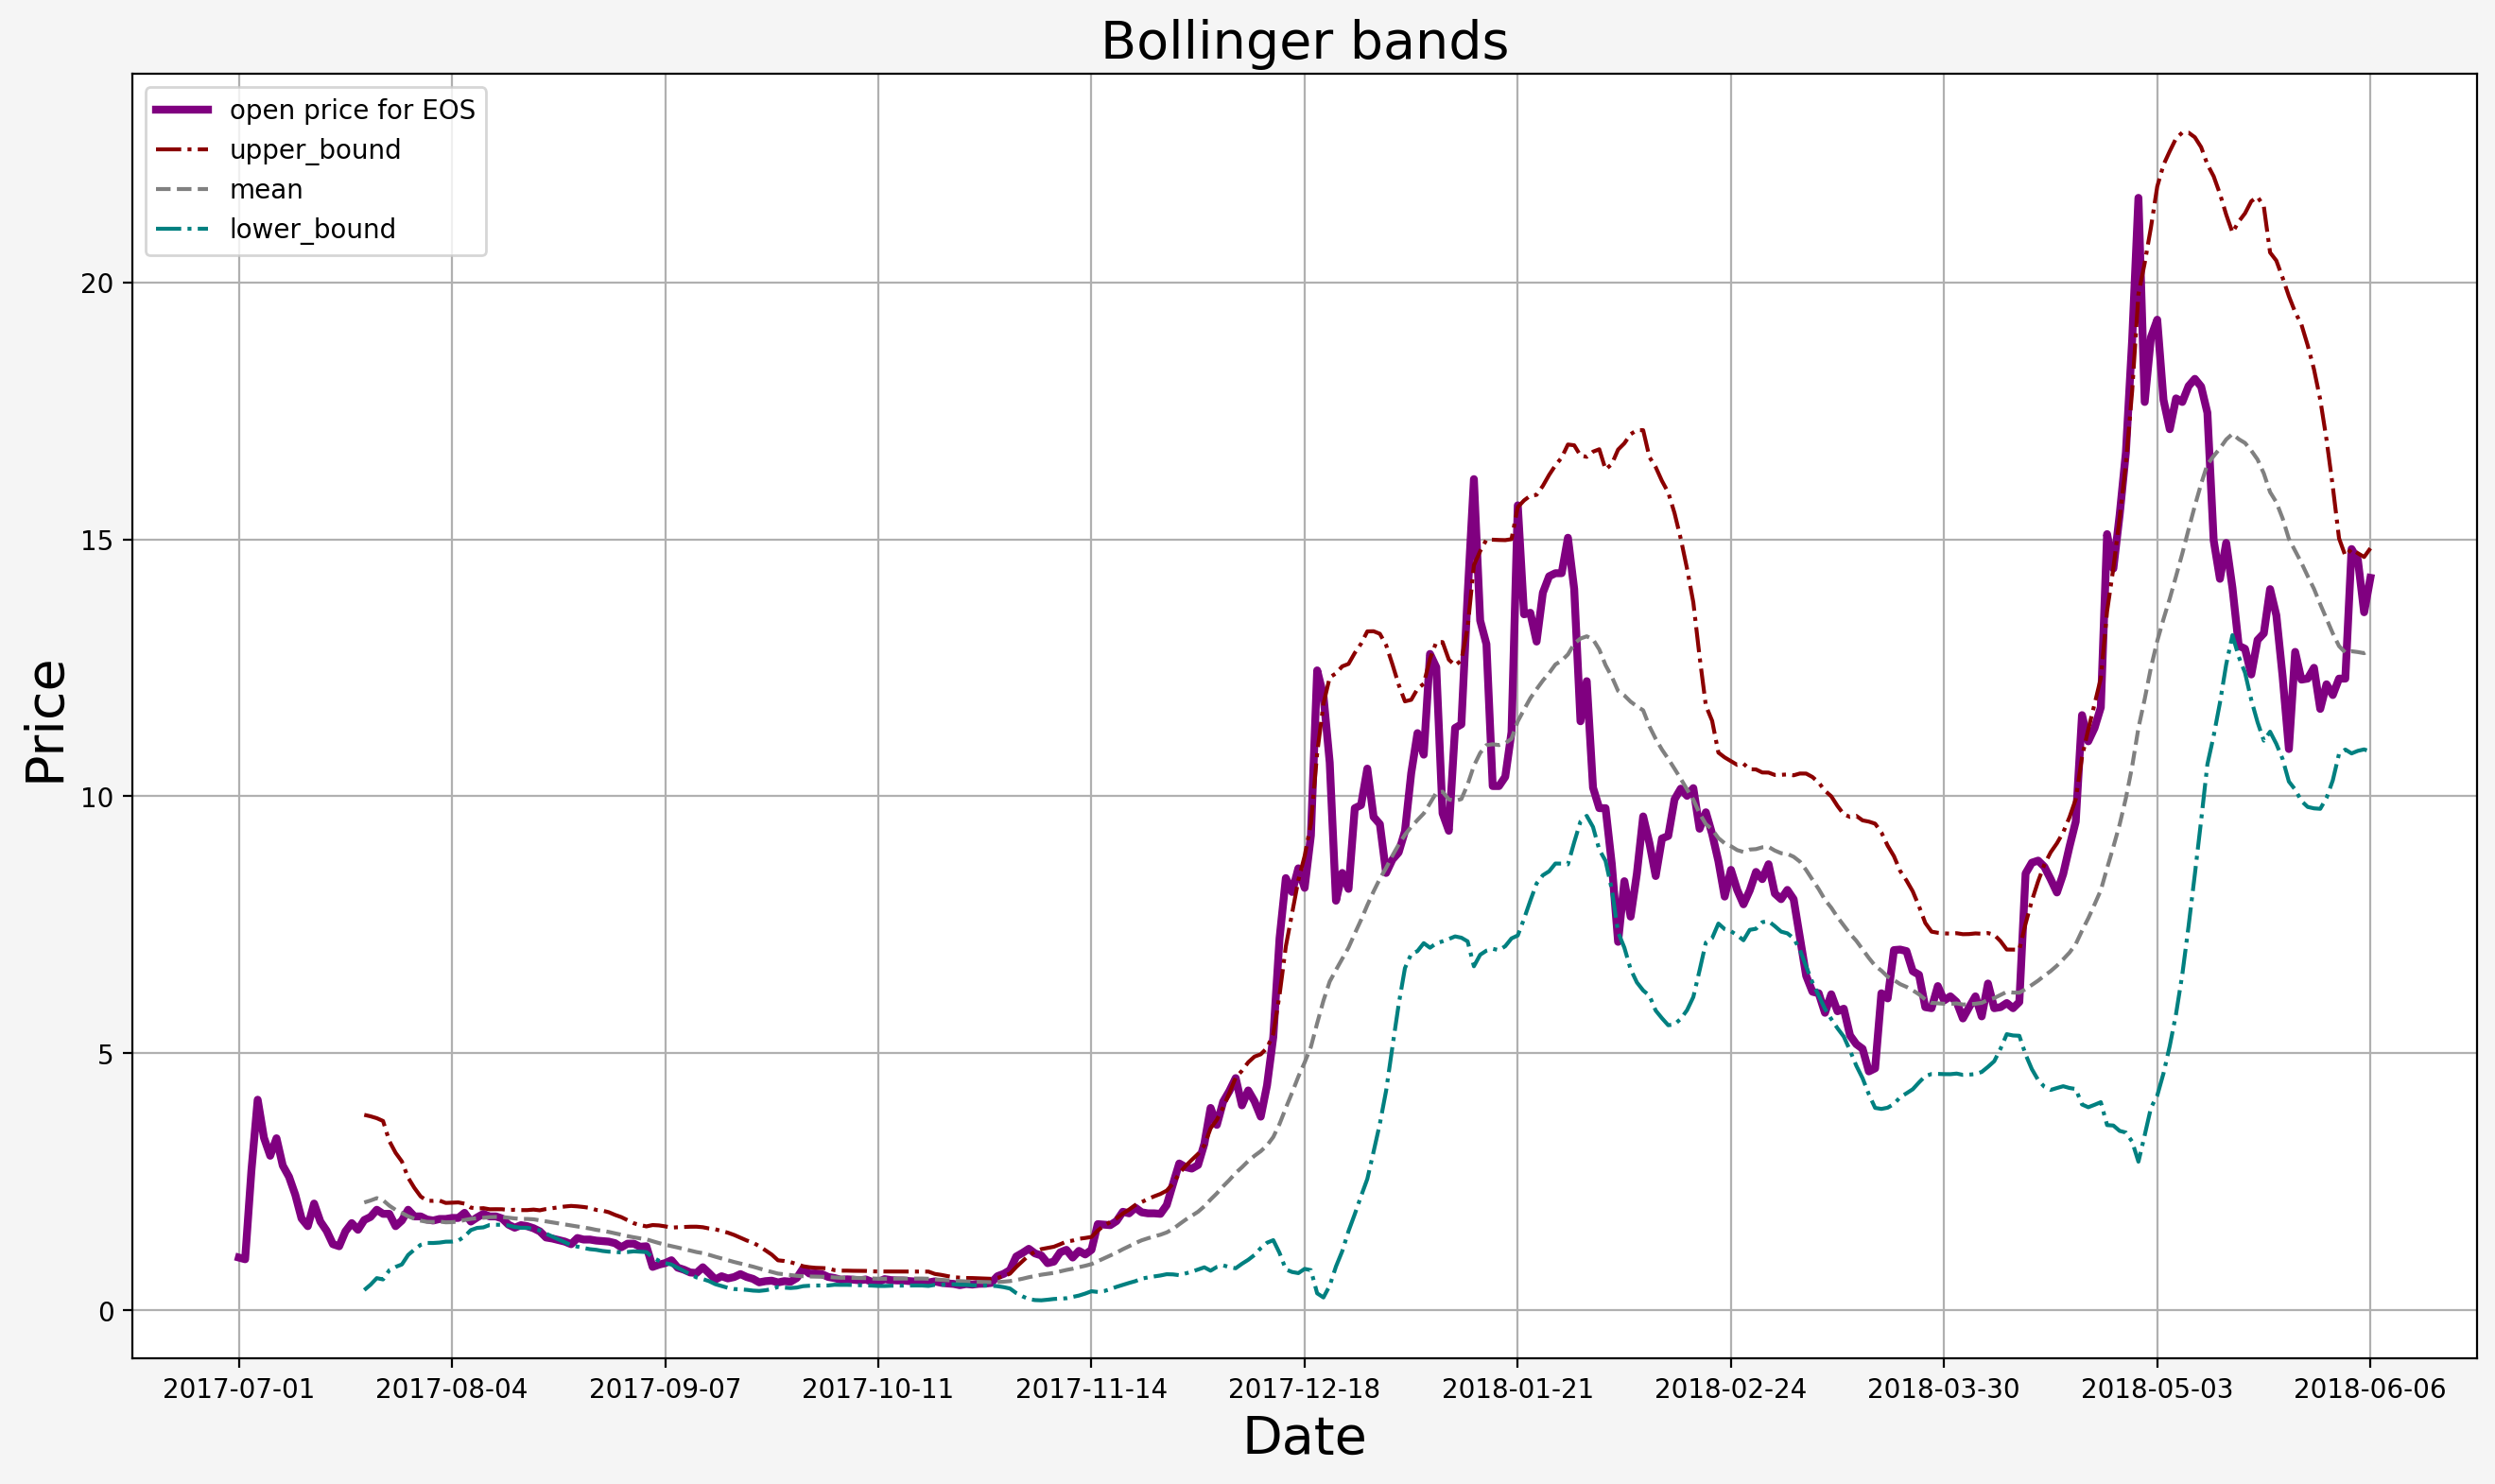

In [20]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

#### Сделайте вывод о том, выполнялось ли правило Боллинджера.

Положение графика цены относительно средней линии должно свидетельствовать о направлении тренда.
Мы видим, что тренд идет вместе с курсом валюты.
Это абсолютно видно на осях (2018-01-27 : 2018-02-26) и далее, потому что там линия идет почти по границе и туда же направляется курс.

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на капитализацию. Давайте поймём почему.

#### Нарисуйте еще два графика. На первом должна быть общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC). На втором - доли капитализаций этих монет от общей капитализации рынка. При этом используйте данные начиная с 2017-07-01.

In [21]:
def plot_coins_capitalizations(coins, symbols, start_date):
    data = coins.loc[start_date:]
    dates = sorted(set(data.index))
    amount_of_days = len(dates)
    
    fig = plt.figure(figsize=(16, 12), facecolor='whitesmoke', dpi=200)
    
    
    xy1 = fig.add_subplot(211)
    xy1.set_title('Market capitalization', fontsize=20)
    temporary = pd.DataFrame(index=dates, columns=['market'])
    for coin in symbols:
        temporary['market'] = data[data['symbol'] == coin]['market']
        xy1.plot(dates, temporary['market'])

    xy1.legend(symbols, loc='best')
    xy1.set_xticks(dates[::amount_of_days // 10])
    xy1.set_ylabel('Capitalization', fontsize=20)
    xy1.grid(True)
        

    xy2 = fig.add_subplot(212)
    sum_of_market = data.groupby(data.index).agg(sum)['market']
    for coin in symbols:
        xy2.plot(dates, data.loc[data['symbol'] == coin]['market'] / sum_of_market)
        
    xy2.legend(symbols, loc='best')
    xy2.set_xticks(dates[::amount_of_days // 10])
    xy2.set_xlabel('Date', fontsize=20)
    xy2.set_ylabel('Relation', fontsize=20)
    xy2.grid(True)
    
    plt.show()

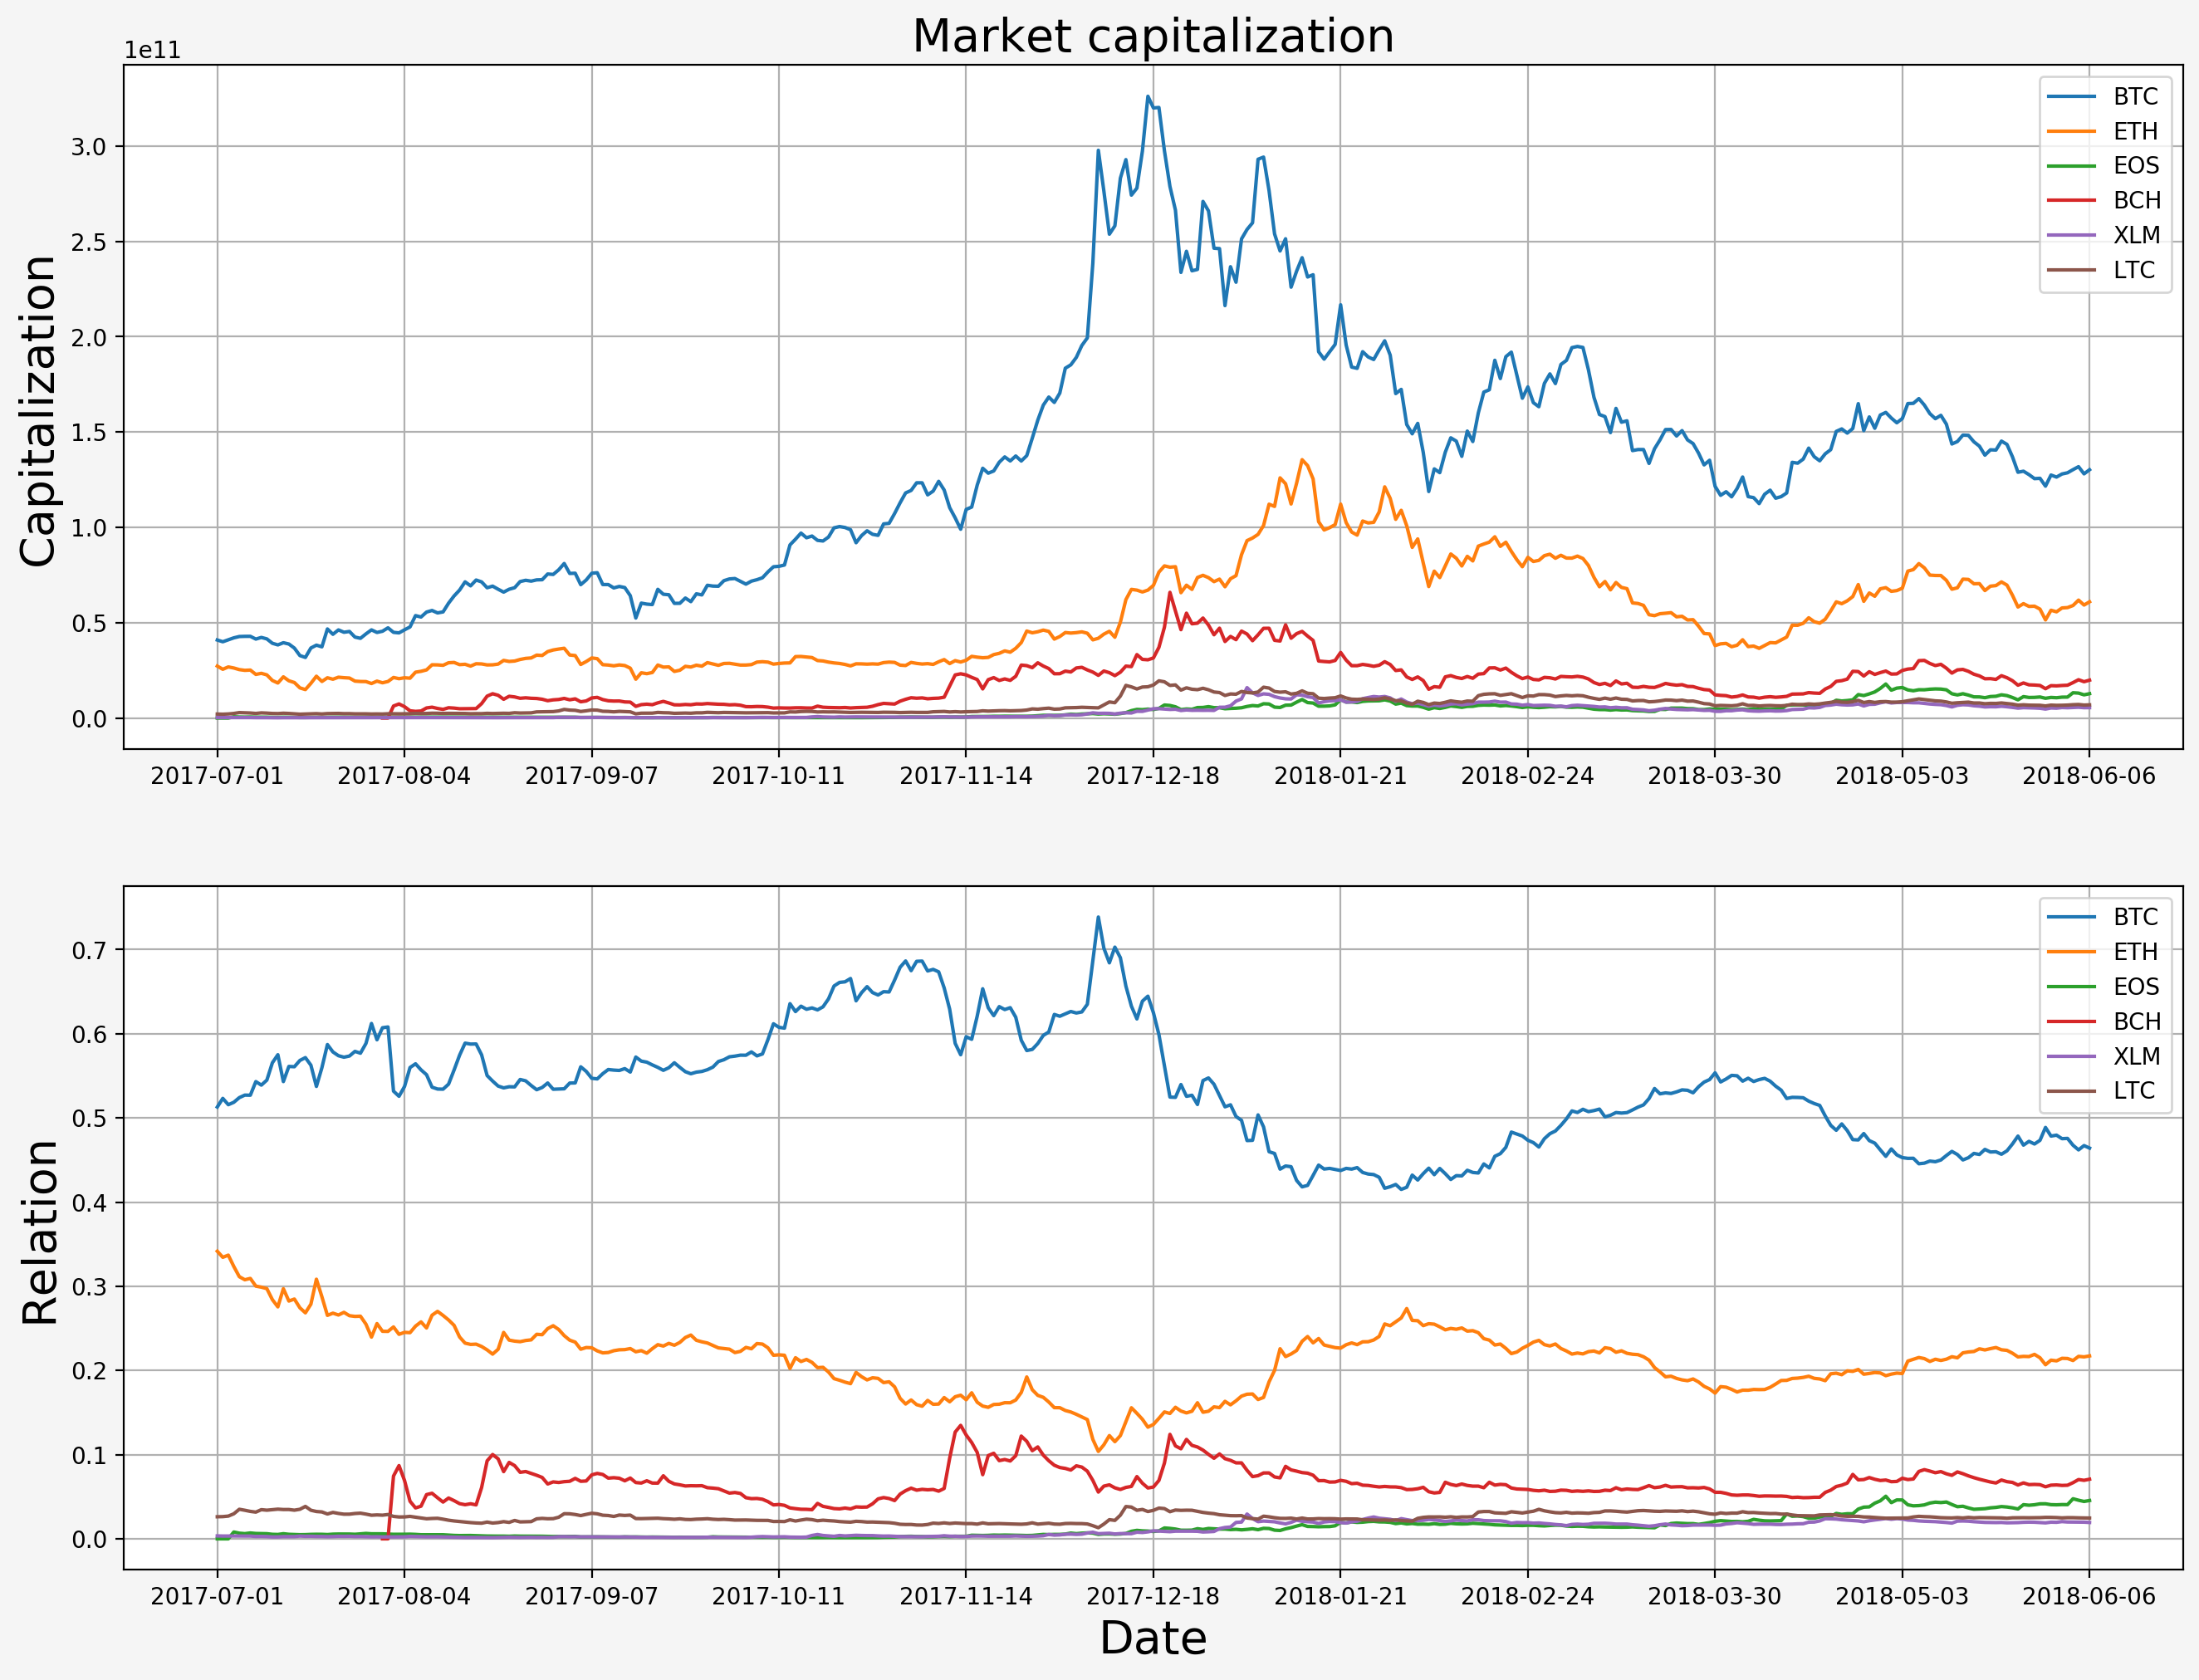

In [22]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

#### Проанализируйте зависимость доли капитализации альткойнов от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

Как видно из курса на [2017-11-14 : 2017-12-18] при подъеме курса биткойна (BTC), повалилась доля эфира (ETH). Лучше всего себя чувствовал биткойн кэш (BCH) и лайткойн (LTC). Отальных валют (стеллар (XLM), еос (EOS)), ситуация коснулась меньше, потому что их доля на рынке мала по сравнению с гигантами.
После этого произошёл обвал биткоина, сопровождающийся подъемом эфира.
Тем не менее, в общей капитализации криптоватного рынка биткоин все еще занимал (и занимает) доминирующее положение.
Я думаю, что причина такой зависимости в текучести людей, вкладывающих в коины. «Эфир» является вторым по капитализации после биткоина, и люди хотят устойчивость своих финансов. Увидев, что сначала биткоин растет, они решили вложить средства в него, а потом при спаде, обратно в эфир. Так происходит, потому что эти две валюты имеют наибольший капитал, поэтому они наиболее устойчивые и приятные вклада, хотя и не приносят такой выйгрыш, как другие.


## 7. Корреляции монет (1 балл)

#### Теперь нужно подробнее посмотреть на корреляции средних капитализаций монет. При этом будем смотреть на среднее сглаженное за последние window дней до дня date с коэффициентом сглаживания alpha для набора монет symbols.  
#### Реализуйте функцию, которая будет возвращать квадратный DataFrame с числом строк и столбцов равным числу рассматриваемых монет и со значениями корреляций.

In [23]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    data = coins.loc[:date]
    dict_coins = dict()
    for name, group in data.groupby('symbol'):
        dict_coins[name] = group
        
    result = pd.DataFrame(columns=symbols, index = symbols)
    
    for column in symbols:
        for string in symbols:
            rolling_for_column = dict_coins[column]['open'].rolling(window).mean()
            rolling_for_string = dict_coins[string]['open'].rolling(window).mean()
            result[column][string] = rolling_for_string.corr(rolling_for_column)
            
    return result
    
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
correlations

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1,0.934098,0.627008,0.941317,0.850106,0.972815,0.683298
ETH,0.934098,1,0.824029,0.782297,0.937118,0.95459,0.931184
EOS,0.627008,0.824029,1,0.649623,0.907151,0.739952,0.683831
BCH,0.941317,0.782297,0.649623,1,0.718494,0.884612,0.796207
XLM,0.850106,0.937118,0.907151,0.718494,1,0.908889,0.914724
LTC,0.972815,0.95459,0.739952,0.884612,0.908889,1,0.810174
ADA,0.683298,0.931184,0.683831,0.796207,0.914724,0.810174,1


In [24]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,0.93,0.63,0.94,0.85,0.97,0.68
ETH,0.93,1.00,0.82,0.78,0.94,0.95,0.93
EOS,0.63,0.82,1.00,0.65,0.91,0.74,0.68
BCH,0.94,0.78,0.65,1.00,0.72,0.88,0.80
XLM,0.85,0.94,0.91,0.72,1.00,0.91,0.91
LTC,0.97,0.95,0.74,0.88,0.91,1.00,0.81
ADA,0.68,0.93,0.68,0.80,0.91,0.81,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [25]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,0.91,0.80,0.93,0.90,0.95,0.94
ETH,0.91,1.00,0.81,0.93,0.81,0.92,0.96
EOS,0.80,0.81,1.00,0.90,0.94,0.91,0.98
BCH,0.93,0.93,0.90,1.00,0.89,0.85,0.81
XLM,0.90,0.81,0.94,0.89,1.00,0.93,0.99
LTC,0.95,0.92,0.91,0.85,0.93,1.00,1.00
ADA,0.94,0.96,0.98,0.81,0.99,1.00,1.00


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия основанная на скользящих средних. Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае. Посмотрим на пример

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что для скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия.
#### Реализуйте функцию, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании 

#### Notes:
Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод shift(1) у Series.
Отношение цен закрытия за сегодня и за вчера - это мой multiplier за сегодняшний день. При этом давайте строить графики накопления для multipliers. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй- 0.5 и в третий 2. То график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).

При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый threshold (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [32]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

#### Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели.

## 9. Отказ от ответственности 
Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.

![Disclamer](https://i0.kym-cdn.com/entries/icons/mobile/000/024/785/Screen_Shot_2017-11-30_at_1.12.37_PM.jpg)